In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
delivery_data = pd.read_csv("delivery_time.csv")
delivery_data.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [15]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [16]:
delivery_data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

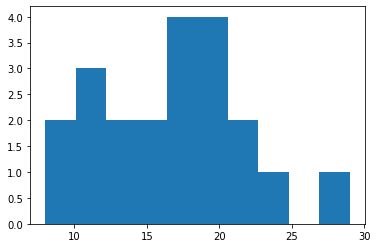

In [19]:
plt.hist(delivery_data['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9c5325248>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9c53fec88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9c538ab88>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9c53e4a88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9c53e1cc8>],
 'means': []}

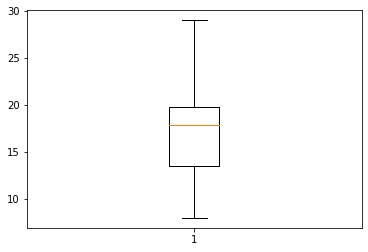

In [24]:
plt.boxplot(delivery_data['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

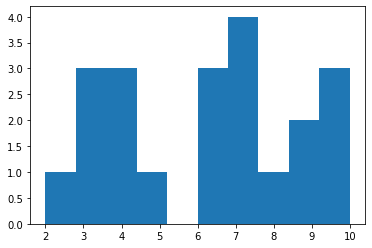

In [26]:
plt.hist(delivery_data['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9c54e7b48>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9c54ea948>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9c54e72c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1a9c54ef7c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a9c54efec8>],
 'means': []}

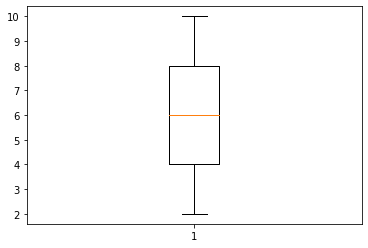

In [27]:
plt.boxplot(delivery_data['Sorting Time'])

In [5]:

x = delivery_data['Sorting Time'].values
y = delivery_data['Delivery Time'].values

Text(0, 0.5, 'Delivery Time')

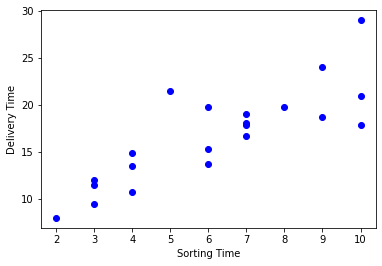

In [35]:
plt.plot(x,y,"bo");plt.xlabel("Sorting Time");plt.ylabel("Delivery Time")

Text(0, 0.5, 'Delivery Time')

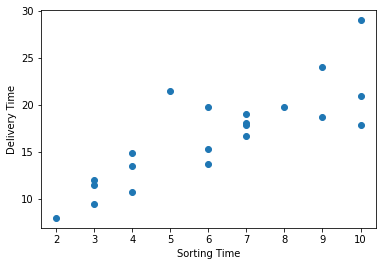

In [38]:
plt.scatter(x,y);plt.xlabel("Sorting Time");plt.ylabel("Delivery Time")

In [6]:
x.corr(y) # Correlation between x and y

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [7]:
np.corrcoef(x,y)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [6]:
# for preparing linear model we need to import statsmodels.formula.api
import statsmodels.formula.api as smf

In [ ]:
# preparing 1st model

In [7]:
delivery_data.rename(columns={'Delivery Time':"Delivery_Time"}, inplace = True)
delivery_data.rename(columns={'Sorting Time':'Sorting_Time'}, inplace = True)

In [94]:
model1 = smf.ols("Delivery_Time ~ Sorting_Time", data = delivery_data).fit()


In [95]:
# For getting coefficients of the varibles used in equation
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [96]:
# P-values for the variables and R-squared value for prepared model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        17:11:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
model1.conf_int(0.05) # 95% of confidence interval



,0,1
Intercept,2.979134,10.186334
Sorting_Time,1.108673,2.189367


In [125]:
#delivery_data["Sorting_Time"]
delivery_data.iloc[:,1]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting_Time, dtype: int64

In [100]:
pred1 = model1.predict(delivery_data.iloc[:,1]) # predicted values of Delivery time using model1

In [101]:
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [102]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt

Text(0, 0.5, 'Delivery Time')

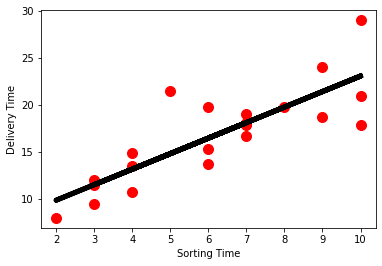

In [112]:
plt.scatter(x,y, color = 'red',s = 100);plt.plot(delivery_data['Sorting_Time'],pred1,color='black',lw = 5);
plt.xlabel("Sorting Time");plt.ylabel("Delivery Time")

In [113]:
pred1.corr(delivery_data["Delivery_Time"])

0.8259972607955325

In [ ]:
# Model2 transformations

In [117]:
model2 = smf.ols('Delivery_Time~ np.sqrt(Sorting_Time)',data=delivery_data).fit()

In [121]:
model2.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [122]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           2.61e-06
Time:                        19:37:57   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
model2.conf_int(0.05)

,0,1
Intercept,-8.788214,3.750541
np.sqrt(Sorting_Time),5.416812,10.456370


In [127]:
pred2 = model2.predict(delivery_data["Sorting_Time"])
pred2

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [128]:
pred2.corr(delivery_data['Delivery_Time'])

0.8341500030755065

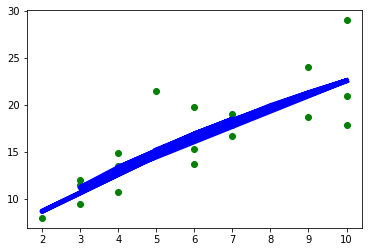

In [135]:
plt.scatter(x,y,color='g');plt.plot(delivery_data['Sorting_Time'],pred2,color='b',lw= 5)

In [8]:
# model3 log transformation

In [9]:
model3 = smf.ols('Delivery_Time~np.log(Sorting_Time)',data = delivery_data).fit()
model3

In [10]:
model3.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [11]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           2.64e-06
Time:                        12:24:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
pred3 = model3.predict(delivery_data['Sorting_Time'])
pred3

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'Delivery_Time')

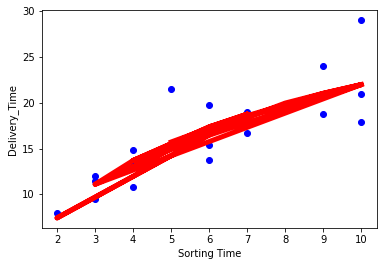

In [14]:
plt.scatter(x,y,c="b");plt.plot(delivery_data["Sorting_Time"],pred3,c='r',lw = 5);
plt.xlabel("Sorting Time");plt.ylabel("Delivery_Time")

In [15]:
pred3.corr(delivery_data['Delivery_Time'])

0.8339325279256242

In [16]:
# implimenting linear Regression model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import train_test_split

In [61]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [87]:
x = delivery_data.iloc[:,:1].values
y = delivery_data.iloc[:,0].values


In [88]:
x 

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [90]:
final_model = LinearRegression()


In [91]:
final_model.fit(x,y)

LinearRegression()

In [92]:
final_model.fit(xtrain, ytrain)

LinearRegression()

In [97]:
# Predicting the Test set results
y_pred = final_model.predict(xtest)
y_pred

array([17.9 , 11.5 , 21.5 , 13.5 , 10.75])

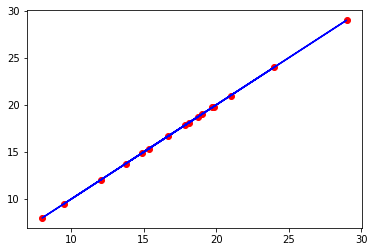

In [100]:
# Visualising the Training set results
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(xtrain, final_model.predict(xtrain), color = 'blue')

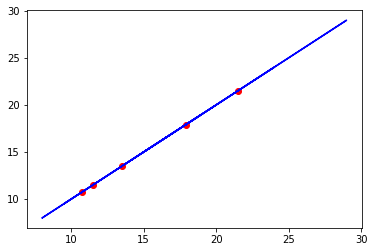

In [103]:
# Visualising the Test set results
plt.scatter(xtest, ytest, color = 'red')
plt.plot(xtrain, final_model.predict(xtrain), color = 'blue')